In [26]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq, fftshift
import os
import matplotlib.pyplot as plt

In [27]:
path = 'data/'
os.listdir(path)

['.ipynb_checkpoints',
 'Neal_Squat_0lbs-2024-09-13_00-29-33.json',
 'Novel_25lbs_Bench-2024-09-13_00-22-49.json',
 'Brian_Bench_0_lbs-2024-09-13_00-07-34.json',
 'Neal_25lbs_Squat-2024-09-13_00-38-02.json',
 'Brian_Deadlift_25lbs-2024-09-13_00-42-14.json',
 'Tejas_Bench_0lbs-2024-09-13_00-13-30.json',
 'Brian_25_Squat-2024-09-13_00-33-58.json',
 'brian_Swuat_0lbs-2024-09-13_00-27-39.json',
 'Tejas_Bench_25lbs-2024-09-13_00-21-16.json',
 'Neal_Bench_0lbs-2024-09-13_00-10-30.json',
 'Neal_0_Squat-2024-09-13_00-36-38.json',
 'Neal_Bench_25lbs-2024-09-13_00-19-25.json',
 'Novel_Bench_0lbs-2024-09-13_00-15-12.json',
 'Neal_25_deadlift-2024-09-13_00-44-42.json',
 'brian_bench_25lbs-2024-09-13_00-17-29.json',
 'Neal_25lbs_Deadlift-2024-09-13_00-40-34.json']

In [28]:
bench, squat, deadlift = [], [], []
b, s, d = [], [], []
for e in os.listdir(path):
    if 'json' in e:
        if 'bench' in e or 'Bench' in e and 'Novel' not in e:
            bench.append(pd.read_json(path + e))
            b.append(e)
        elif 'Squat' in e or 'squat' in e or 'Swuat' in e:
            squat.append(pd.read_json(path+e))
            s.append(e)
        else:
            d.append(e)
            deadlift.append(pd.read_json(path+e))


            

In [29]:
b

['Brian_Bench_0_lbs-2024-09-13_00-07-34.json',
 'Tejas_Bench_0lbs-2024-09-13_00-13-30.json',
 'Tejas_Bench_25lbs-2024-09-13_00-21-16.json',
 'Neal_Bench_0lbs-2024-09-13_00-10-30.json',
 'Neal_Bench_25lbs-2024-09-13_00-19-25.json',
 'brian_bench_25lbs-2024-09-13_00-17-29.json']

In [30]:
d

['Novel_25lbs_Bench-2024-09-13_00-22-49.json',
 'Brian_Deadlift_25lbs-2024-09-13_00-42-14.json',
 'Novel_Bench_0lbs-2024-09-13_00-15-12.json',
 'Neal_25_deadlift-2024-09-13_00-44-42.json',
 'Neal_25lbs_Deadlift-2024-09-13_00-40-34.json']

In [31]:
s

['Neal_Squat_0lbs-2024-09-13_00-29-33.json',
 'Neal_25lbs_Squat-2024-09-13_00-38-02.json',
 'Brian_25_Squat-2024-09-13_00-33-58.json',
 'brian_Swuat_0lbs-2024-09-13_00-27-39.json',
 'Neal_0_Squat-2024-09-13_00-36-38.json']

In [32]:
ax = bench[1].axes

In [33]:
len(deadlift), len(bench), len(squat)

(5, 6, 5)

In [34]:
ax

[RangeIndex(start=0, stop=6195, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

In [10]:
pt = bench[2]['rotationRateY']


In [36]:
def plot_fft(s, signame=None):
    s = np.nan_to_num(s.to_numpy(), 0)
    freq = fftshift(fft(s))
    freq = fftshift(fftfreq(s.shape[-1]))
    plt.plot(s)
    plt.title('signal ' + (signame if signame is not None else ""))
    plt.show()
    plt.plot(freq, abs(fft(s)))
    plt.title('mag of fft')
    plt.show()
    plt.plot(freq, np.arctan(fft(s).imag/(fft(s).real)))
    plt.title('phase fft')
    plt.show()

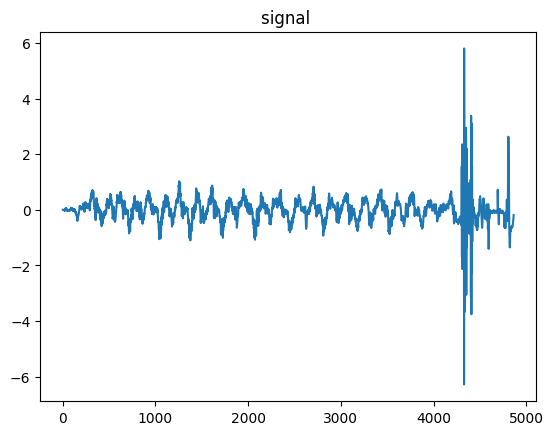

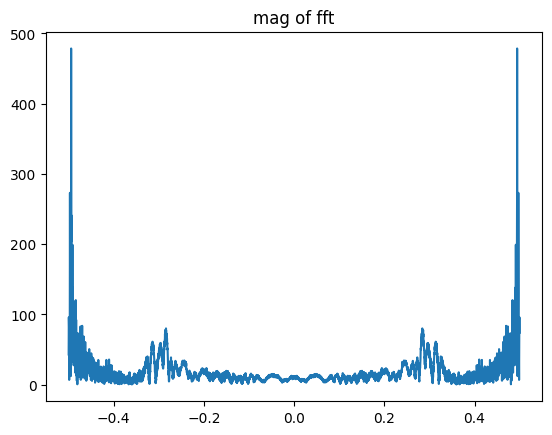

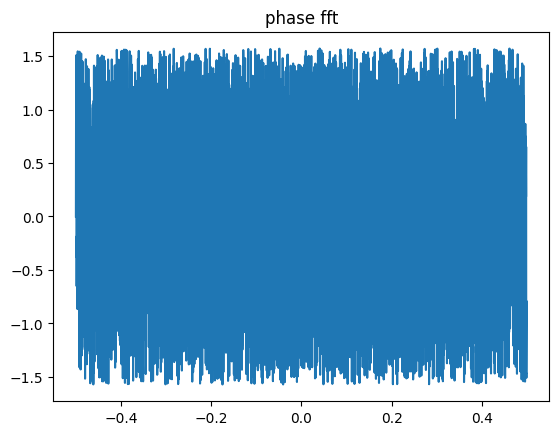

In [37]:
plot_fft(pt)

In [51]:
def plot_fft_against_eachother(s1, s2, s3, signame):
    s1 = np.nan_to_num(s1.to_numpy(), 0)
    s2 = np.nan_to_num(s2.to_numpy(), 0)
    s3 = np.nan_to_num(s3.to_numpy(), 0)
    i=1
        
    for s, name in zip([s1, s2, s3], signame):
        s = s - np.mean(s)
        freq = fftshift(fft(s))
        freq = fftshift(fftfreq(s.shape[-1]))
        
        plt.subplot(3, 3, i)
        plt.plot(s)
        plt.title('signal ' + (name if name is not None else ""))
        i+=1
        
        plt.subplot(3, 3, i)
        plt.plot(freq, abs(fft(s)))
        plt.title('mag of fft')
        i+=1

        plt.subplot(3, 3, i)
        plt.plot(freq, np.arctan(fft(s).imag/fft(s).real))
        plt.title('phase part of fft')
        
        i+=1
    plt.tight_layout()
    plt.show()

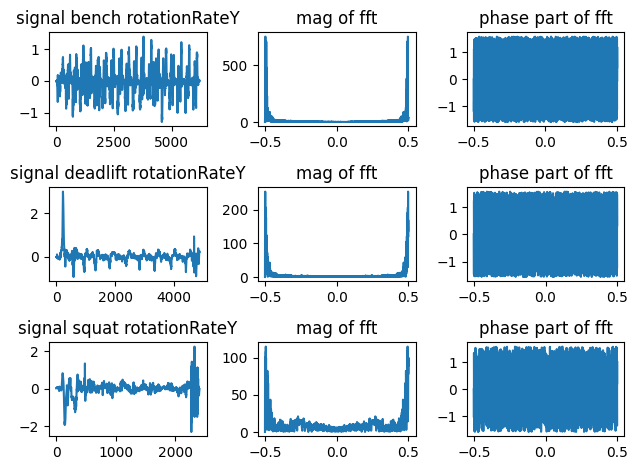

In [52]:
idx = 1
pt1 = bench[idx]['rotationRateY']
pt2 = deadlift[idx]['rotationRateY']
pt3 = squat[idx]['rotationRateY']

plot_fft_against_eachother(pt1, pt2, pt3, ['bench rotationRateY', 'deadlift rotationRateY', 'squat rotationRateY' ])

In [53]:
def compare_all(a, b, c, label):
    idx1, idx2, idx3 = a, b, c
    pt1 = bench[idx1][label ]
    pt2 = deadlift[idx2][label]
    pt3 = squat[idx3][label]

    plot_fft_against_eachother(pt1, pt2, pt3, [f'bench {label}', f'deadlift {label}', f'squat {label}' ])

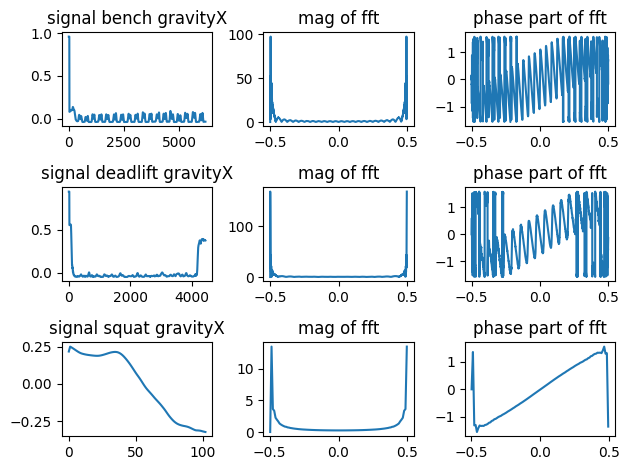

In [54]:
compare_all(1, 2, 4, 'gravityX')

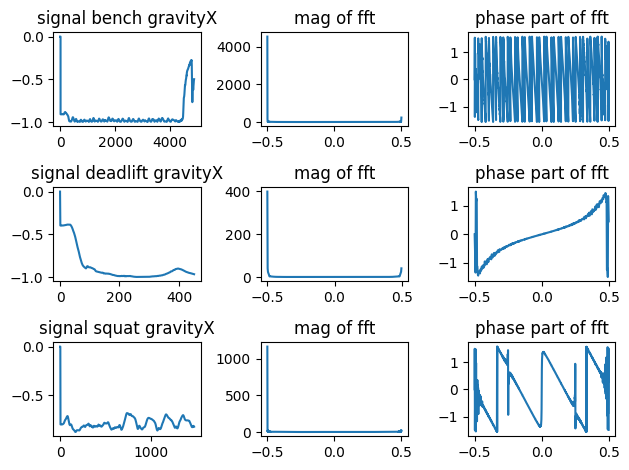

In [44]:
compare_all(2, 0, 2, 'gravityX')

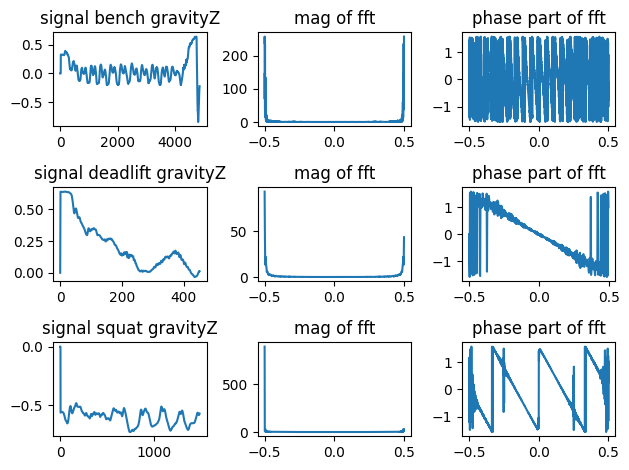

In [45]:
compare_all(2, 0, 2, 'gravityZ')

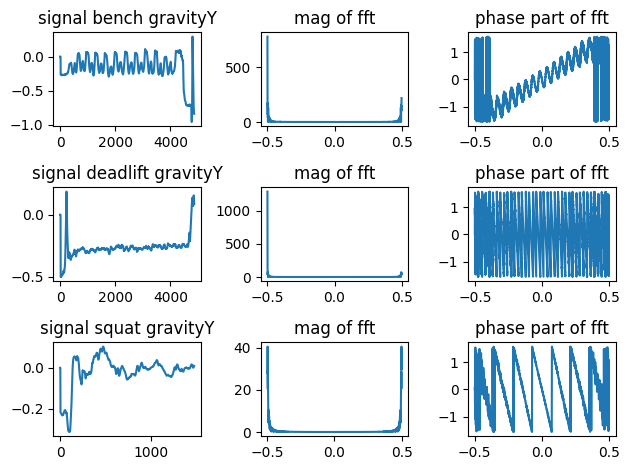

In [46]:
compare_all(2, 1, 2, 'gravityY')

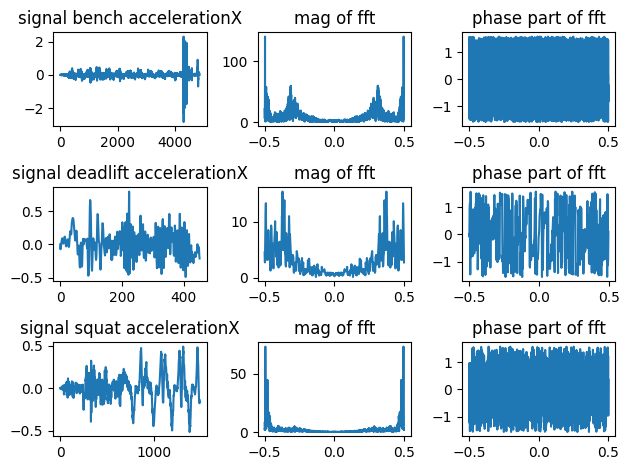

In [47]:
compare_all(2, 0, 2, 'accelerationX')

In [48]:
ax

[RangeIndex(start=0, stop=6195, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

In [49]:
def plot_all_data(bench, label):
    i = 1
    
    for s in bench:
        plt.subplot(1, len(bench), i)
        plt.plot(np.nan_to_num(s[label].to_numpy(), 0))
        i+=1
        
    plt.show()

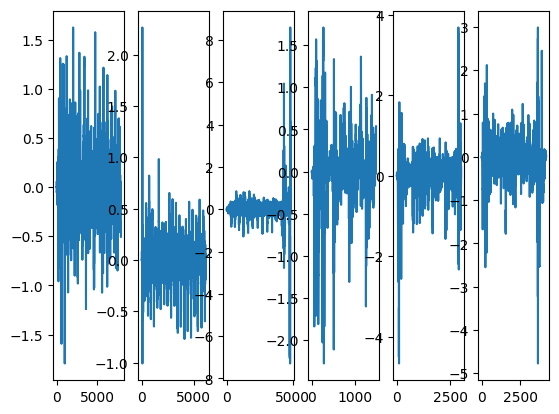

In [50]:
plot_all_data(bench, 'rotationRateX')